In [1]:
path = "/home/kissg/Gode/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt"

In [2]:
import json

records = [json.loads(line) for line in open(path)]  # list of dict

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [10]:
time_zones = [rec["tz"] for rec in records if "tz"in rec]  # May fields missing

# 计数的几种方式:


1. 遍历, 将计数值保存在字典中. 也分复杂的和简洁的: 普通字典 vs. defaultdict (会自动创建不存在的键的字典)

2. 使用 collections.Counter

3. 使用 pandas

In [8]:
# 使用普通字典保存计数值

def get_counts(seq):
    
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

dict

In [11]:
# 使用 defaultdict

from collections import defaultdict
def get_counts2(seq):
    
    counts = defaultdict()
    for x in seq:
        counts[x] += 1
    return counts

In [12]:
# 字典处理计数的技巧

def top_counts(count_dict, n=10):
    
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()  # sort 直接对列表进行操作, sorted 返回排序的副本
    return value_key_pairs[-n:]  # 逆序

In [14]:
# 利用 collections.Counter 计数

from collections import Counter  # 为什么有些类大写, 有些类小写, 比如上面的 defaultdict

counts = Counter(time_zones)     # 计数值就是元素出现的次数

counts.most_common(10)           # 使用还挺方便

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [15]:
# 使用 pandas 计数

from pandas import DataFrame, Series
import pandas as pd
import numpy as np

frame = DataFrame(records)

In [16]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [17]:
frame["tz"][:10]  # fields missing

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [20]:
frame[:10]["u"]

0          http://www.ncbi.nlm.nih.gov/pubmed/22415991
1          http://www.monroecounty.gov/etc/911/rss.php
2    http://boxer.senate.gov/en/press/releases/0316...
3              http://apod.nasa.gov/apod/ap120312.html
4    http://www.shrewsbury-ma.gov/egov/gallery/1341...
5    http://www.shrewsbury-ma.gov/egov/gallery/1341...
6    http://www.nasa.gov/mission_pages/nustar/main/...
7    http://www.nasa.gov/mission_pages/nustar/main/...
8    http://www.nasa.gov/mission_pages/nustar/main/...
9              http://apod.nasa.gov/apod/ap120312.html
Name: u, dtype: object

In [21]:
tz_counts = frame["tz"].value_counts()

In [22]:
tz_counts[:10]  # fields missing

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [24]:
clean_tz = frame['tz'].fillna("Missing")  # Fill NA/NaN with "Missing"

In [26]:
clean_tz[clean_tz == ''] = "Unknown"      # strong bool filter

In [27]:
tz_counts = clean_tz.value_counts()       # tz_counts - Series obj

In [28]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

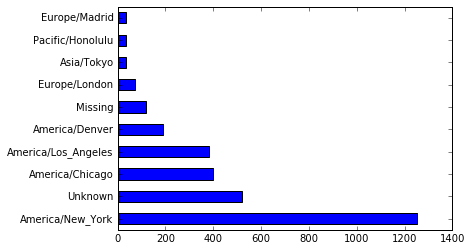

In [41]:
tz_counts[:10].plot(kind="barh", rot=0)    # barh for bar horizontal (水平的)

In [43]:
# pd.Series.dropna - return Series without null values
results = Series([x.split()[0] for x in frame['a'].dropna()])

In [44]:
results.value_counts()[:]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [45]:
cframe = frame[frame.a.notnull()]  # Yet another bool filter

In [46]:
# where(condition, [x, y]) - Return elements, either from x or y, depending on condition
operating_system = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [56]:
by_tz_os = cframe.groupby(["tz", operating_system])

In [53]:
# size() - 计数
# unstack() - 对计数结果进行重塑
agg_counts = by_tz_os.size().unstack().fillna(0)  # agg_counts - DataFrame

In [52]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [65]:
x = by_tz_os.size()
x.__class__

pandas.core.series.Series

In [67]:
indexer = agg_counts.sum(1).argsort()

indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [74]:
agg_counts.sum(1)

tz
                                   521
Africa/Cairo                         3
Africa/Casablanca                    1
Africa/Ceuta                         2
Africa/Johannesburg                  1
Africa/Lusaka                        1
America/Anchorage                    5
America/Argentina/Buenos_Aires       1
America/Argentina/Cordoba            1
America/Argentina/Mendoza            1
America/Bogota                       3
America/Caracas                      1
America/Chicago                    400
America/Chihuahua                    2
America/Costa_Rica                   1
America/Denver                     191
America/Edmonton                     6
America/Guayaquil                    2
America/Halifax                      4
America/Indianapolis                20
America/La_Paz                       1
America/Lima                         1
America/Los_Angeles                382
America/Managua                      3
America/Mazatlan                     1
America/Mexico_City   

In [75]:
agg_counts.sum(0)

Not Windows    1194
Windows        2246
dtype: float64

In [77]:
count_subset = agg_counts.take(indexer)[-10:]

count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


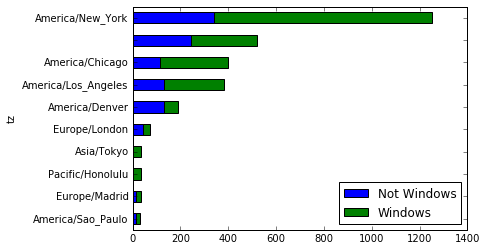

In [78]:
count_subset.plot(kind="barh", stacked=True)  # stacked=True - 堆积

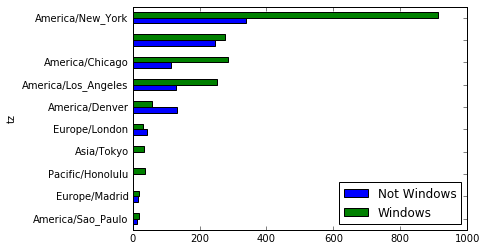

In [79]:
count_subset.plot(kind="barh")

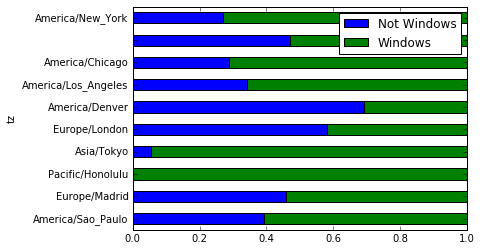

In [81]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

normed_subset.plot(kind="barh", stacked=True)